# Importing the libraries 

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing the Data

In [3]:
df=pd.read_excel(r"C:\Users\USER\Desktop\imarticus\crypto_scraping\BTC\BTC_2018-2022.xlsx",header=0)
df.head()

,Date,open,High,Low,close,Volume,Market_cap
0,"Mar 04, 2022",42458.14,42479.61,38805.85,39137.60,28516271427,742617908335
1,"Mar 03, 2022",43925.20,44021.58,41914.75,42451.79,24967782593,805466458785
2,"Mar 02, 2022",44357.62,45077.58,43432.85,43924.12,29183112630,833361543695
3,"Mar 01, 2022",43194.50,44793.60,42952.58,44354.64,32479047645,841491170716
4,"Feb 28, 2022",37706.00,43760.46,37518.21,43193.23,35690014104,819414782676


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1523 non-null   object 
 1   open        1523 non-null   float64
 2   High        1523 non-null   float64
 3   Low         1523 non-null   float64
 4   close       1523 non-null   float64
 5   Volume      1523 non-null   int64  
 6   Market_cap  1523 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 83.4+ KB


In [6]:
df['Date']=pd.to_datetime(df['Date']) # to convert object to datetime

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1523 non-null   datetime64[ns]
 1   open        1523 non-null   float64       
 2   High        1523 non-null   float64       
 3   Low         1523 non-null   float64       
 4   close       1523 non-null   float64       
 5   Volume      1523 non-null   int64         
 6   Market_cap  1523 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 83.4 KB


In [8]:
df.isnull().sum() # checking NUll values

Date          0
open          0
High          0
Low           0
close         0
Volume        0
Market_cap    0
dtype: int64

In [9]:
close_price=df[['Date','close']]  # Taking Date and Closing price of BTC 
close_price.shape

(1523, 2)

In [10]:
close_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1523 non-null   datetime64[ns]
 1   close   1523 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.9 KB


In [11]:
close_price=close_price.set_index("Date")  # Makeing Date as Index number
close_price.head()

,close
Date,
2022-03-04,39137.60
2022-03-03,42451.79
2022-03-02,43924.12
2022-03-01,44354.64
2022-02-28,43193.23


In [12]:
y=close_price['close'].resample("d").mean()  # Doing perdiction on Days  

In [13]:
print(y.shape)
y

(1523,)


Date
2018-01-02    14982.10
2018-01-03    15201.00
2018-01-04    15599.20
2018-01-05    17429.50
2018-01-06    17527.00
                ...   
2022-02-28    43193.23
2022-03-01    44354.64
2022-03-02    43924.12
2022-03-03    42451.79
2022-03-04    39137.60
Freq: D, Name: close, Length: 1523, dtype: float64

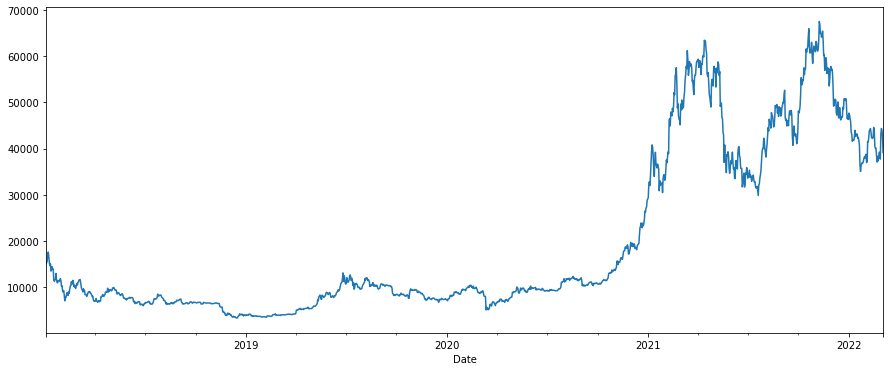

In [154]:
y.plot(figsize=(15,6)) # ploting the entire Data which we have to predict
plt.show()

# Splitting the data in Train and Test 

In [18]:
train=y.loc[:'2020-12-31']
print(train.shape)
train

(1095,)


Date
2018-01-02    14982.10
2018-01-03    15201.00
2018-01-04    15599.20
2018-01-05    17429.50
2018-01-06    17527.00
                ...   
2020-12-27    26272.29
2020-12-28    27084.81
2020-12-29    27362.44
2020-12-30    28840.95
2020-12-31    29001.72
Freq: D, Name: close, Length: 1095, dtype: float64

In [19]:
test=y.loc['2021-01-01':]
print(test.shape)
test

(428,)


Date
2021-01-01    29374.15
2021-01-02    32127.27
2021-01-03    32782.02
2021-01-04    31971.91
2021-01-05    33992.43
                ...   
2022-02-28    43193.23
2022-03-01    44354.64
2022-03-02    43924.12
2022-03-03    42451.79
2022-03-04    39137.60
Freq: D, Name: close, Length: 428, dtype: float64

# Plotting the Splitted data

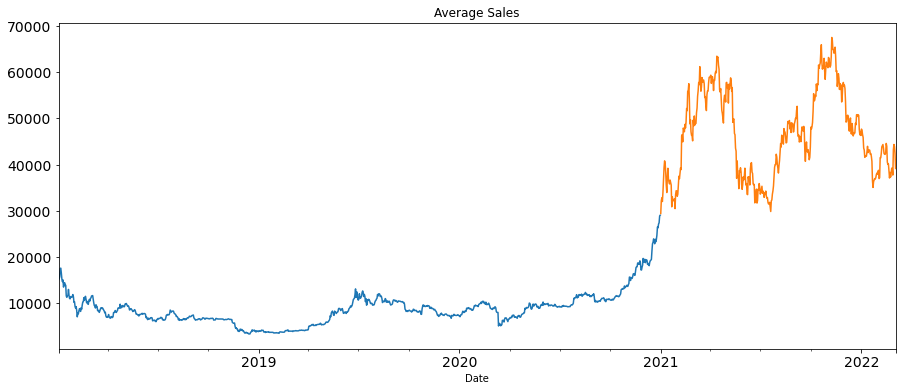

In [153]:
train.plot(figsize=(15,6),title= "Average Sales", fontsize=14)
test.plot(figsize=(15,6),title= "Average Sales", fontsize=14)
plt.show()

# checking Trend and seasoniality and decide which method is to apply

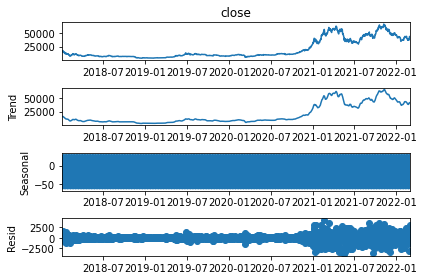

<Figure size 1440x720 with 0 Axes>

In [152]:
import statsmodels.api as sm 
decomposition=sm.tsa.seasonal_decompose(y)  
fig=decomposition.plot()
plt.figure(figsize=(20,10))
plt.show()

- By looking at the trend and seasonal graph there is No trend and No seasonality 

# Appling Multiple Model and check which model will give the best prediction

# ARIMA 

In [128]:
import pmdarima as pm 

# To find the best p d q and P D Q values 

In [129]:
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=25441.812, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=25437.150, Time=0.28 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=25438.060, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=25440.173, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=25442.954, Time=0.11 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=25432.213, Time=0.80 sec
 ARIMA(1,1,0)(3,0,0)[12] intercept   : AIC=25429.732, Time=1.81 sec
 ARIMA(1,1,0)(3,0,1)[12] intercept   : AIC=25429.850, Time=6.08 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=25428.814, Time=1.99 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=25428.487, Time=0.71 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=25438.055, Time=0.28 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=25428.644, Time=2.40 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=25433.938, Time=0.75 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=5.18 sec
 ARIMA(0,1,

In [130]:
model.aic()

25425.08711525958

In [131]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,order=(0,1,0),seasonal_order=(1,0,1,12)).fit()

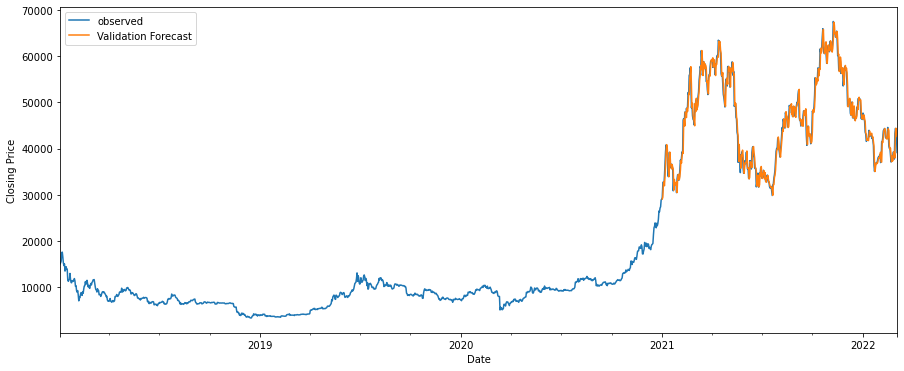

In [166]:
pred = model.get_prediction(start=pd.to_datetime('2021-01-01')) 
#pred = model.get_forecast(steps=12)

plt.figure(figsize=(15,6))
ax = y['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
plt.legend()
plt.show()

In [167]:
pred.predicted_mean

Date
2021-01-01    29040.678431
2021-01-02    29433.815802
2021-01-03    32027.214048
2021-01-04    32802.408943
2021-01-05    31927.349779
                  ...     
2022-02-28    37939.724470
2022-03-01    43486.199646
2022-03-02    44387.932132
2022-03-03    44040.301490
2022-03-04    42615.498263
Freq: D, Name: predicted_mean, Length: 428, dtype: float64

In [171]:
Y_pred=pred.predicted_mean
Y_test=test

from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE value:",rms)

RMSE value: 1836.1793845095956


In [135]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(y,order=(0,1,0),seasonal_order=(1,0,1,12)).fit()

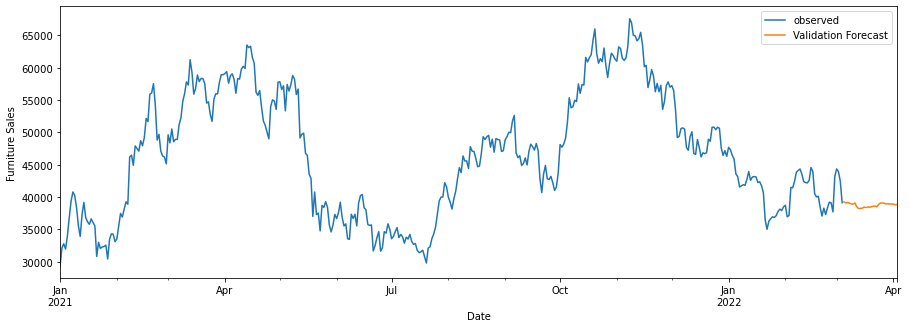

In [148]:
#pred = model.get_prediction(start=pd.to_datetime('2021-01-1')) 
pred = model.get_forecast(steps=30)

plt.figure(figsize=(15,5))
ax = y['2021':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [137]:
pred.predicted_mean.tail(20)

2022-03-15    38292.625765
2022-03-16    38457.248154
2022-03-17    38379.254332
2022-03-18    38474.487834
2022-03-19    38439.440138
2022-03-20    38506.718880
2022-03-21    38593.064853
2022-03-22    38612.435476
2022-03-23    38490.748210
2022-03-24    38898.339549
2022-03-25    39090.521888
2022-03-26    39080.771549
2022-03-27    39048.434519
2022-03-28    38933.256437
2022-03-29    38987.824828
2022-03-30    38921.194693
2022-03-31    38945.715819
2022-04-01    38898.644236
2022-04-02    38838.232261
2022-04-03    38824.679601
Freq: D, Name: predicted_mean, dtype: float64

# Arima model giving good  result compaire to other model 

# SimpleExpSmoothing 

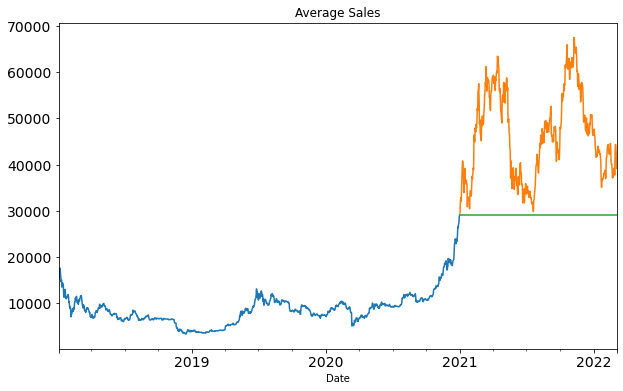

In [155]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.99)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))

train.plot(figsize=(15,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(15,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

- smoothing level=alpha
- alpha value should be in the range of 0 to 1.
- values close to 0 indicate that older values are very less imp compared to the recent values
- values close to 1 indicate that older values are equally imp

In [76]:
Exp_Smooth.SES # predicted values

2021-01-01    28999.964163
2021-01-02    28999.964163
2021-01-03    28999.964163
2021-01-04    28999.964163
2021-01-05    28999.964163
                  ...     
2022-02-28    28999.964163
2022-03-01    28999.964163
2022-03-02    28999.964163
2022-03-03    28999.964163
2022-03-04    28999.964163
Freq: D, Length: 428, dtype: float64

In [77]:
fit1.aic # get aic value

12958.292302631913

In [78]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test,Exp_Smooth.SES))
print(rmse)

19850.420227002633


# using Holt method 

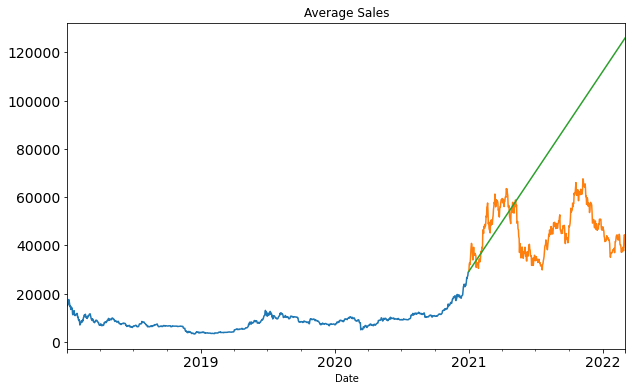

In [161]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
fit1 = Holt(train).fit(smoothing_level=0.97,smoothing_slope=0.02)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))

train.plot(figsize=(15,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(15,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [90]:
fit1.aic

12949.188955944956

In [91]:
Holt_df['Holt_linear']

2021-01-01     29229.571335
2021-01-02     29456.570026
2021-01-03     29683.568717
2021-01-04     29910.567408
2021-01-05     30137.566098
                  ...      
2022-02-28    125250.017571
2022-03-01    125477.016262
2022-03-02    125704.014953
2022-03-03    125931.013644
2022-03-04    126158.012335
Freq: D, Length: 428, dtype: float64

In [92]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test,Holt_df.Holt_linear))
print(rmse)

42489.86190212026


# For best alpha and beta value 

In [88]:
import numpy as np
for i in np.arange(0,1,0.01):
    for j in np.arange(0,1,0.01):
        #from statsmodels.tsa.api import Holt
        Holt_df = test.copy()
        #soothing slope=beta
        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)
        #Holt_df['Holt_linear'] = fit1.forecast(len(test))
        print(fit1.aic,i,j)

17709.125788765028 0.0 0.0
17709.12578975384 0.0 0.01
17709.125788765003 0.0 0.02
17709.125788774043 0.0 0.03
17709.125789831793 0.0 0.04
17709.125788857727 0.0 0.05
17709.125788777088 0.0 0.06
17709.125788771347 0.0 0.07
17709.125788930825 0.0 0.08
17709.12578924599 0.0 0.09
17709.12578884543 0.0 0.1
17709.125788930825 0.0 0.11
17709.125788930825 0.0 0.12
17709.125788930825 0.0 0.13
17709.125788930825 0.0 0.14
17709.125788765316 0.0 0.15
17709.125788797184 0.0 0.16
17709.125788779227 0.0 0.17
17709.125788775164 0.0 0.18
17709.125788930825 0.0 0.19
17709.125788768175 0.0 0.2
17709.12578877606 0.0 0.21
17709.125788767178 0.0 0.22
17709.125789014124 0.0 0.23
17709.125788930825 0.0 0.24
17709.125788930825 0.0 0.25
17709.125788775127 0.0 0.26
17709.125788764755 0.0 0.27
17709.125788866524 0.0 0.28
17709.125789831793 0.0 0.29
17709.125788852365 0.0 0.3
17709.125789330636 0.0 0.31
17709.125789831793 0.0 0.32
17709.12578897937 0.0 0.33
17709.12578897937 0.0 0.34
17709.125788775353 0.0 0.35000

16113.791110594015 0.02 0.81
16120.633569844418 0.02 0.8200000000000001
16127.07777501532 0.02 0.8300000000000001
16133.087258948895 0.02 0.84
16138.635553258593 0.02 0.85
16143.70844208454 0.02 0.86
16148.30167446949 0.02 0.87
16152.436743800215 0.02 0.88
16156.153973198581 0.02 0.89
16159.554320472636 0.02 0.9
16162.762027053106 0.02 0.91
16165.93145144682 0.02 0.92
16169.23079864537 0.02 0.93
16172.819509115521 0.02 0.9400000000000001
16176.842992580314 0.02 0.9500000000000001
16181.404256227705 0.02 0.96
16186.58604288497 0.02 0.97
16192.43157304994 0.02 0.98
16198.960926534246 0.02 0.99
16232.517587902714 0.03 0.0
16042.143942706534 0.03 0.01
15931.841407443786 0.03 0.02
15846.83516625887 0.03 0.03
15785.543047644245 0.03 0.04
15739.446041508436 0.03 0.05
15708.179588255616 0.03 0.06
15697.28246950929 0.03 0.07
15707.882918230402 0.03 0.08
15735.781925337944 0.03 0.09
15774.135389430056 0.03 0.1
15816.205426952547 0.03 0.11
15856.829720916161 0.03 0.12
15892.498834077787 0.03 0.13

15194.092724683873 0.05 0.61
15182.806179203842 0.05 0.62
15172.086079326875 0.05 0.63
15161.976464709924 0.05 0.64
15152.496257082781 0.05 0.65
15143.646807084007 0.05 0.66
15135.418761464249 0.05 0.67
15127.797367562333 0.05 0.68
15120.765879522729 0.05 0.6900000000000001
15114.306885444303 0.05 0.7000000000000001
15108.402076469543 0.05 0.71
15103.030776529931 0.05 0.72
15098.167825164172 0.05 0.73
15093.781716467378 0.05 0.74
15089.833040414009 0.05 0.75
15086.273488259341 0.05 0.76
15083.046082013283 0.05 0.77
15080.086111335917 0.05 0.78
15077.3227287849 0.05 0.79
15074.681180101308 0.05 0.8
15072.085436329764 0.05 0.81
15069.460859674493 0.05 0.8200000000000001
15066.737132619885 0.05 0.8300000000000001
15063.850793510675 0.05 0.84
15060.748163511356 0.05 0.85
15057.386560599462 0.05 0.86
15053.738243572661 0.05 0.87
15049.789944585506 0.05 0.88
15045.544529472465 0.05 0.89
15041.021160791915 0.05 0.9
15036.254221755273 0.05 0.91
15031.291924467678 0.05 0.92
15026.193752082203 0

14752.13201063002 0.08 0.38
14743.221305980971 0.08 0.39
14734.5802782778 0.08 0.4
14726.289415139488 0.08 0.41000000000000003
14718.40719588556 0.08 0.42
14710.970333159152 0.08 0.43
14703.99569091085 0.08 0.44
14697.482725058975 0.08 0.45
14691.416306341618 0.08 0.46
14685.769719699103 0.08 0.47000000000000003
14680.507750311566 0.08 0.48
14675.589834005586 0.08 0.49
14670.973179627423 0.08 0.5
14666.615877923934 0.08 0.51
14662.479621596138 0.08 0.52
14658.532070821015 0.08 0.53
14654.748618948799 0.08 0.54
14651.113406127879 0.08 0.55
14647.619562676024 0.08 0.56
14644.26867562039 0.08 0.5700000000000001
14641.069565712716 0.08 0.58
14638.036589928026 0.08 0.59
14635.187581251395 0.08 0.6
14632.54184384933 0.08 0.61
14630.11808414151 0.08 0.62
14627.932953410558 0.08 0.63
14625.999985035953 0.08 0.64
14624.32877622447 0.08 0.65
14622.925132002958 0.08 0.66
14621.791324559283 0.08 0.67
14620.9267656176 0.08 0.68
14620.3291050265 0.08 0.6900000000000001
14619.995142609694 0.08 0.7000

14551.771070785735 0.11 0.15
14544.716115444773 0.11 0.16
14537.697099760897 0.11 0.17
14530.65533537324 0.11 0.18
14523.53761161951 0.11 0.19
14516.301657668806 0.11 0.2
14508.919829485743 0.11 0.21
14501.382234227352 0.11 0.22
14493.699153436388 0.11 0.23
14485.902196466312 0.11 0.24
14478.042839795466 0.11 0.25
14470.188952538372 0.11 0.26
14462.418744113222 0.11 0.27
14454.813973286624 0.11 0.28
14447.453115483266 0.11 0.29
14440.405622173752 0.11 0.3
14433.728010108385 0.11 0.31
14427.46183250633 0.11 0.32
14421.633356257218 0.11 0.33
14416.2551954967 0.11 0.34
14411.328286289161 0.11 0.35000000000000003
14406.844945557306 0.11 0.36
14402.791883190093 0.11 0.37
14399.153077305902 0.11 0.38
14395.912218743339 0.11 0.39
14393.054541131509 0.11 0.4
14390.568055387022 0.11 0.41000000000000003
14388.444034264769 0.11 0.42
14386.677108427755 0.11 0.43
14385.26440653088 0.11 0.44
14384.20571127853 0.11 0.45
14383.501886771746 0.11 0.46
14383.15444023759 0.11 0.47000000000000003
14383.165

14507.990696554132 0.13 0.96
14510.201348021463 0.13 0.97
14512.436276338645 0.13 0.98
14514.710408645291 0.13 0.99
14588.231953789968 0.14 0.0
14459.919963401087 0.14 0.01
14407.047429623213 0.14 0.02
14382.31877961883 0.14 0.03
14370.433008439433 0.14 0.04
14363.67363231077 0.14 0.05
14358.131021877425 0.14 0.06
14352.208510010278 0.14 0.07
14345.522851678897 0.14 0.08
14338.198357546878 0.14 0.09
14330.488107083165 0.14 0.1
14322.611066704198 0.14 0.11
14314.708229887307 0.14 0.12
14306.851791434889 0.14 0.13
14299.069962095791 0.14 0.14
14291.37035755731 0.14 0.15
14283.75662797984 0.14 0.16
14276.238443660392 0.14 0.17
14268.836475650824 0.14 0.18
14261.583834244491 0.14 0.19
14254.524987563918 0.14 0.2
14247.712698393932 0.14 0.21
14241.203822903453 0.14 0.22
14235.054613155044 0.14 0.23
14229.316438334856 0.14 0.24
14224.032472649049 0.14 0.25
14219.235760799418 0.14 0.26
14214.94869212934 0.14 0.27
14211.183654671657 0.14 0.28
14207.94454268414 0.14 0.29
14205.228676884937 0.14

14284.784296741764 0.16 0.72
14288.025568166702 0.16 0.73
14291.164460765127 0.16 0.74
14294.215018139475 0.16 0.75
14297.191148594164 0.16 0.76
14300.106323853639 0.16 0.77
14302.973261585217 0.16 0.78
14305.803675679888 0.16 0.79
14308.608049217764 0.16 0.8
14311.395405579548 0.16 0.81
14314.173231256083 0.16 0.8200000000000001
14316.947128656075 0.16 0.8300000000000001
14319.721184211063 0.16 0.84
14322.497489793785 0.16 0.85
14325.276421024433 0.16 0.86
14328.056583367981 0.16 0.87
14330.834863979593 0.16 0.88
14333.606637649804 0.16 0.89
14336.365855963173 0.16 0.9
14339.104979281004 0.16 0.91
14341.815521527715 0.16 0.92
14344.487858498222 0.16 0.93
14347.111523207715 0.16 0.9400000000000001
14349.675382951058 0.16 0.9500000000000001
14352.167759412005 0.16 0.96
14354.5765970381 0.16 0.97
14356.889615846363 0.16 0.98
14359.094454882992 0.16 0.99
14372.189088987225 0.17 0.0
14257.181747555354 0.17 0.01
14210.001688252327 0.17 0.02
14187.11090927501 0.17 0.03
14174.76924456641 0.17

14089.054633823353 0.19 0.54
14093.409295093317 0.19 0.55
14097.609955849304 0.19 0.56
14101.659279201265 0.19 0.5700000000000001
14105.561647241453 0.19 0.58
14109.322895731526 0.19 0.59
14112.949995623507 0.19 0.6
14116.450775211933 0.19 0.61
14119.833569494156 0.19 0.62
14123.10690711561 0.19 0.63
14126.279313120765 0.19 0.64
14129.35858379702 0.19 0.65
14132.352366764726 0.19 0.66
14135.267087183987 0.19 0.67
14138.108225898113 0.19 0.68
14140.879979455718 0.19 0.6900000000000001
14143.585308124899 0.19 0.7000000000000001
14146.22570491957 0.19 0.71
14148.801299939061 0.19 0.72
14151.310795767202 0.19 0.73
14153.751555417104 0.19 0.74
14156.119657167514 0.19 0.75
14158.410035280733 0.19 0.76
14160.6165634452 0.19 0.77
14162.732245093357 0.19 0.78
14164.749341671475 0.19 0.79
14166.659516831172 0.19 0.8
14168.454077876235 0.19 0.81
14170.124071138553 0.19 0.8200000000000001
14171.660449361827 0.19 0.8300000000000001
14173.054312054068 0.19 0.84
14174.296951068656 0.19 0.85
14175.380

13871.22050786708 0.22 0.3
13875.4787869661 0.22 0.31
13879.949474324747 0.22 0.32
13884.595540265758 0.22 0.33
13889.381009963197 0.22 0.34
13894.271194240884 0.22 0.35000000000000003
13899.233013362596 0.22 0.36
13904.235239534812 0.22 0.37
13909.248717714547 0.22 0.38
13914.246606168354 0.22 0.39
13919.204568731202 0.22 0.4
13924.100803647809 0.22 0.41000000000000003
13928.916363017408 0.22 0.42
13933.634980232911 0.22 0.43
13938.243092663855 0.22 0.44
13942.729917136028 0.22 0.45
13947.08719478482 0.22 0.46
13951.309018292557 0.22 0.47000000000000003
13955.391789414683 0.22 0.48
13959.333806040982 0.22 0.49
13963.135074767419 0.22 0.5
13966.797007719653 0.22 0.51
13970.322135531076 0.22 0.52
13973.713743586406 0.22 0.53
13976.97565903052 0.22 0.54
13980.111871208084 0.22 0.55
13983.126333403925 0.22 0.56
13986.022682332925 0.22 0.5700000000000001
13988.804045928346 0.22 0.58
13991.472883359995 0.22 0.59
13994.030840305555 0.22 0.6
13996.478688484358 0.22 0.61
13998.81623539094 0.22

13770.608917341031 0.25 0.09
13765.89870775112 0.25 0.1
13761.689316211934 0.25 0.11
13758.027858562582 0.25 0.12
13754.948764790357 0.25 0.13
13752.47453966994 0.25 0.14
13750.61673033405 0.25 0.15
13749.376748481305 0.25 0.16
13748.746672031823 0.25 0.17
13748.710179368714 0.25 0.18
13749.243715925219 0.25 0.19
13750.317680366796 0.25 0.2
13751.89775082772 0.25 0.21
13753.946044751747 0.25 0.22
13756.422237649502 0.25 0.23
13759.284419799244 0.25 0.24
13762.490006675338 0.25 0.25
13765.996302339141 0.25 0.26
13769.760992720006 0.25 0.27
13773.74276067414 0.25 0.28
13777.90152189376 0.25 0.29
13782.198854346325 0.25 0.3
13786.598261143214 0.25 0.31
13791.06548788672 0.25 0.32
13795.568602623121 0.25 0.33
13800.078438008486 0.25 0.34
13804.568466545154 0.25 0.35000000000000003
13809.015038966445 0.25 0.36
13813.397368132793 0.25 0.37
13817.697522049806 0.25 0.38
13821.900377289996 0.25 0.39
13825.993455304068 0.25 0.4
13829.966786951714 0.25 0.41000000000000003
13833.812688769303 0.25 

13770.857613977949 0.27 0.91
13769.162597538887 0.27 0.92
13767.500561292642 0.27 0.93
13765.875201869218 0.27 0.9400000000000001
13764.289813910189 0.27 0.9500000000000001
13762.74746938542 0.27 0.96
13761.250894961531 0.27 0.97
13759.802569510251 0.27 0.98
13758.404708306645 0.27 0.99
13837.438708517688 0.28 0.0
13757.09443824751 0.28 0.01
13724.497938613968 0.28 0.02
13708.011866370949 0.28 0.03
13698.254332675515 0.28 0.04
13691.372723627548 0.28 0.05
13685.747269851148 0.28 0.06
13680.782000471385 0.28 0.07
13676.31102223638 0.28 0.08
13672.324886784614 0.28 0.09
13668.85765597171 0.28 0.1
13665.945975542949 0.28 0.11
13663.616681538017 0.28 0.12
13661.884340268303 0.28 0.13
13660.751647401132 0.28 0.14
13660.210584550472 0.28 0.15
13660.24371947056 0.28 0.16
13660.825585331862 0.28 0.17
13661.924173527785 0.28 0.18
13663.502313673082 0.28 0.19
13665.519104197569 0.28 0.2
13667.931176439322 0.28 0.21
13670.693806858462 0.28 0.22
13673.76186372204 0.28 0.23
13677.0906382959 0.28 0.

13692.107498320549 0.3 0.74
13690.849173999382 0.3 0.75
13689.577658342985 0.3 0.76
13688.299530927989 0.3 0.77
13687.021073565766 0.3 0.78
13685.748238750395 0.3 0.79
13684.48667480246 0.3 0.8
13683.241635173317 0.3 0.81
13682.018102368784 0.3 0.8200000000000001
13680.82068126008 0.3 0.8300000000000001
13679.653643401261 0.3 0.84
13678.520919007111 0.3 0.85
13677.426186909004 0.3 0.86
13676.372748893973 0.3 0.87
13675.36368897383 0.3 0.88
13674.401770907889 0.3 0.89
13673.489536924297 0.3 0.9
13672.62929147282 0.3 0.91
13671.823120741305 0.3 0.92
13671.072871448398 0.3 0.93
13670.380265284048 0.3 0.9400000000000001
13669.746789170435 0.3 0.9500000000000001
13669.173804041897 0.3 0.96
13668.66249157338 0.3 0.97
13668.213908350725 0.3 0.98
13667.828973451755 0.3 0.99
13734.99818992083 0.31 0.0
13661.654598246965 0.31 0.01
13632.12464168354 0.31 0.02
13617.296251840731 0.31 0.03
13608.613387170677 0.31 0.04
13602.62011973167 0.31 0.05
13597.876184665703 0.31 0.06
13593.846119334887 0.31 

13616.097111504747 0.33 0.53
13616.217568844235 0.33 0.54
13616.230278708726 0.33 0.55
13616.141007153461 0.33 0.56
13615.955858069465 0.33 0.5700000000000001
13615.681238896173 0.33 0.58
13615.323833561193 0.33 0.59
13614.890537782883 0.33 0.6
13614.3883858279 0.33 0.61
13613.824589551827 0.33 0.62
13613.206371485709 0.33 0.63
13612.540978481433 0.33 0.64
13611.835612777597 0.33 0.65
13611.097384940354 0.33 0.66
13610.33326849918 0.33 0.67
13609.550064500907 0.33 0.68
13608.754361230489 0.33 0.6900000000000001
13607.952504782326 0.33 0.7000000000000001
13607.150586774394 0.33 0.71
13606.354368513184 0.33 0.72
13605.56938190314 0.33 0.73
13604.800784819286 0.33 0.74
13604.053467635425 0.33 0.75
13603.331951569162 0.33 0.76
13602.640509068242 0.33 0.77
13601.98302925098 0.33 0.78
13601.363158307917 0.33 0.79
13600.784219147194 0.33 0.8
13600.249276118002 0.33 0.81
13599.761057371019 0.33 0.8200000000000001
13599.322123753229 0.33 0.8300000000000001
13598.934726318499 0.33 0.84
13598.600

13555.04800237698 0.35000000000000003 0.8300000000000001
13555.17152878294 0.35000000000000003 0.84
13555.353064370036 0.35000000000000003 0.85
13555.593467982062 0.35000000000000003 0.86
13555.8934130195 0.35000000000000003 0.87
13556.253390112186 0.35000000000000003 0.88
13556.673721932604 0.35000000000000003 0.89
13557.154573420104 0.35000000000000003 0.9
13557.695954919263 0.35000000000000003 0.91
13558.29771433569 0.35000000000000003 0.92
13558.959572930225 0.35000000000000003 0.93
13559.681110534833 0.35000000000000003 0.9400000000000001
13560.461783796874 0.35000000000000003 0.9500000000000001
13561.300900493789 0.35000000000000003 0.96
13562.197694991812 0.35000000000000003 0.97
13563.151262759593 0.35000000000000003 0.98
13564.16060813566 0.35000000000000003 0.99
13590.190052994967 0.36 0.0
13526.854374881703 0.36 0.01
13501.75433229829 0.36 0.02
13489.409225479134 0.36 0.03
13482.406959827858 0.36 0.04
13477.810983399828 0.36 0.05
13474.405807958436 0.36 0.06
13471.7287989203

13493.499106286834 0.38 0.47000000000000003
13493.953010021334 0.38 0.48
13494.32557913266 0.38 0.49
13494.623141770377 0.38 0.5
13494.852201523687 0.38 0.51
13495.019380319738 0.38 0.52
13495.131385718372 0.38 0.53
13495.194958182143 0.38 0.54
13495.216830248019 0.38 0.55
13495.203685326804 0.38 0.56
13495.162106636515 0.38 0.5700000000000001
13495.098563895395 0.38 0.58
13495.019338710918 0.38 0.59
13494.930541847723 0.38 0.6
13494.838048609341 0.38 0.61
13494.747474472957 0.38 0.62
13494.664200330351 0.38 0.63
13494.59330451881 0.38 0.64
13494.539581291725 0.38 0.65
13494.507525107681 0.38 0.66
13494.501330180516 0.38 0.67
13494.52488537798 0.38 0.68
13494.581779397668 0.38 0.6900000000000001
13494.675301295356 0.38 0.7000000000000001
13494.808441701685 0.38 0.71
13494.983921169087 0.38 0.72
13495.204163480366 0.38 0.73
13495.471339887277 0.38 0.74
13495.78734930932 0.38 0.75
13496.153853142014 0.38 0.76
13496.572260148914 0.38 0.77
13497.043774601994 0.38 0.78
13497.5693322101 0.38

13399.812071864011 0.41000000000000003 0.25
13402.41294448861 0.41000000000000003 0.26
13404.939614350566 0.41000000000000003 0.27
13407.379835008247 0.41000000000000003 0.28
13409.723865774991 0.41000000000000003 0.29
13411.964210518261 0.41000000000000003 0.3
13414.09537337416 0.41000000000000003 0.31
13416.113617314903 0.41000000000000003 0.32
13418.016744951838 0.41000000000000003 0.33
13419.803895713321 0.41000000000000003 0.34
13421.47537736487 0.41000000000000003 0.35000000000000003
13423.032477703613 0.41000000000000003 0.36
13424.477382676887 0.41000000000000003 0.37
13425.813007335324 0.41000000000000003 0.38
13427.042920959317 0.41000000000000003 0.39
13428.171250285626 0.41000000000000003 0.4
13429.20261377876 0.41000000000000003 0.41000000000000003
13430.142043930282 0.41000000000000003 0.42
13430.994932879823 0.41000000000000003 0.43
13431.766973936565 0.41000000000000003 0.44
13432.46410940534 0.41000000000000003 0.45
13433.092484315799 0.41000000000000003 0.46
13433.658

13406.92944308872 0.43 0.62
13407.630801474419 0.43 0.63
13408.368505670618 0.43 0.64
13409.144870868524 0.43 0.65
13409.961941789441 0.43 0.66
13410.821470165194 0.43 0.67
13411.724997837848 0.43 0.68
13412.67378638353 0.43 0.6900000000000001
13413.668876230306 0.43 0.7000000000000001
13414.711074099747 0.43 0.71
13415.80098882435 0.43 0.72
13416.939018143883 0.43 0.73
13418.125381632335 0.43 0.74
13419.360095416783 0.43 0.75
13420.64305457081 0.43 0.76
13421.973966377183 0.43 0.77
13423.35242005998 0.43 0.78
13424.777836620155 0.43 0.79
13426.249570463095 0.43 0.8
13427.766834755217 0.43 0.81
13429.328751716355 0.43 0.8200000000000001
13430.934364220919 0.43 0.8300000000000001
13432.582623859504 0.43 0.84
13434.272440084258 0.43 0.85
13436.002636674879 0.43 0.86
13437.772015760109 0.43 0.87
13439.579328426104 0.43 0.88
13441.423275493342 0.43 0.89
13443.30259102744 0.43 0.9
13445.215928804684 0.43 0.91
13447.16198178738 0.43 0.92
13449.13941870225 0.43 0.93
13451.146907607006 0.43 0.

13342.184738115653 0.46 0.38
13343.414153896838 0.46 0.39
13344.581319753943 0.46 0.4
13345.691893284189 0.46 0.41000000000000003
13346.751678285358 0.46 0.42
13347.766568987709 0.46 0.43
13348.742490617915 0.46 0.44
13349.685355353988 0.46 0.45
13350.601012461151 0.46 0.46
13351.495209899611 0.46 0.47000000000000003
13352.37355671429 0.46 0.48
13353.241491011237 0.46 0.49
13354.10425356863 0.46 0.5
13354.966861276383 0.46 0.51
13355.834087484358 0.46 0.52
13356.710446715462 0.46 0.53
13357.60018125124 0.46 0.54
13358.507250346078 0.46 0.55
13359.435330270306 0.46 0.56
13360.387795522878 0.46 0.5700000000000001
13361.367744081497 0.46 0.58
13362.377976458736 0.46 0.59
13363.421007874218 0.46 0.6
13364.499070400158 0.46 0.61
13365.61413619098 0.46 0.62
13366.767902409638 0.46 0.63
13367.96182046809 0.46 0.64
13369.197093378918 0.46 0.65
13370.474689093156 0.46 0.66
13371.795357278652 0.46 0.67
13373.159655482343 0.46 0.68
13374.5679263415 0.46 0.6900000000000001
13376.020336242733 0.46 

13349.43408045241 0.48 0.67
13351.071905150277 0.48 0.68
13352.751208492182 0.48 0.6900000000000001
13354.471758790967 0.48 0.7000000000000001
13356.233187341066 0.48 0.71
13358.035011742124 0.48 0.72
13359.876620949837 0.48 0.73
13361.757320155213 0.48 0.74
13363.676318036314 0.48 0.75
13365.632747388228 0.48 0.76
13367.625654877524 0.48 0.77
13369.654058641563 0.48 0.78
13371.716900248459 0.48 0.79
13373.81309779421 0.48 0.8
13375.941529177679 0.48 0.81
13378.101043891995 0.48 0.8200000000000001
13380.290477890096 0.48 0.8300000000000001
13382.508650869564 0.48 0.84
13384.754380280141 0.48 0.85
13387.026471926807 0.48 0.86
13389.323745368974 0.48 0.87
13391.645027159655 0.48 0.88
13393.989148377079 0.48 0.89
13396.354957840225 0.48 0.9
13398.741319403394 0.48 0.91
13401.147117238155 0.48 0.92
13403.571251989984 0.48 0.93
13406.012652486996 0.48 0.9400000000000001
13408.470266242246 0.48 0.9500000000000001
13410.943065245312 0.48 0.96
13413.430045071384 0.48 0.97
13415.930229594902 0.

13285.033051195735 0.51 0.45
13286.410565135018 0.51 0.46
13287.791617325187 0.51 0.47000000000000003
13289.18031108932 0.51 0.48
13290.580486074641 0.51 0.49
13291.995717147776 0.51 0.5
13293.429313414503 0.51 0.51
13294.884290805587 0.51 0.52
13296.363412651297 0.51 0.53
13297.869152773088 0.51 0.54
13299.403716386918 0.51 0.55
13300.969047662784 0.51 0.56
13302.566833394849 0.51 0.5700000000000001
13304.198515424798 0.51 0.58
13305.865289750893 0.51 0.59
13307.568138018538 0.51 0.6
13309.307823489427 0.51 0.61
13311.084896415965 0.51 0.62
13312.899738671094 0.51 0.63
13314.752535877175 0.51 0.64
13316.64331508481 0.51 0.65
13318.571961306463 0.51 0.66
13320.538210121722 0.51 0.67
13322.541674392345 0.51 0.68
13324.581851463396 0.51 0.6900000000000001
13326.658138207998 0.51 0.7000000000000001
13328.769835171217 0.51 0.71
13330.91616627827 0.51 0.72
13333.096289028696 0.51 0.73
13335.309279135827 0.51 0.74
13337.554190364663 0.51 0.75
13339.830009869753 0.51 0.76
13342.135696586403 0

13196.455105299163 0.54 0.17
13198.932953185511 0.54 0.18
13201.436591818023 0.54 0.19
13203.946341208395 0.54 0.2
13206.445506921771 0.54 0.21
13208.92028370665 0.54 0.22
13211.359573154172 0.54 0.23
13213.754757006249 0.54 0.24
13216.099477405729 0.54 0.25
13218.389375725139 0.54 0.26
13220.62184124696 0.54 0.27
13222.795782525935 0.54 0.28
13224.91140359115 0.54 0.29
13226.969986033813 0.54 0.3
13228.973731502436 0.54 0.31
13230.925566349144 0.54 0.32
13232.829007782368 0.54 0.33
13234.688031296093 0.54 0.34
13236.506948232935 0.54 0.35000000000000003
13238.290319109545 0.54 0.36
13240.042851519373 0.54 0.37
13241.769335755962 0.54 0.38
13243.47456979978 0.54 0.39
13245.163308366367 0.54 0.4
13246.84021590046 0.54 0.41000000000000003
13248.509823177028 0.54 0.42
13250.176488039335 0.54 0.43
13251.844383803471 0.54 0.44
13253.517457894806 0.54 0.45
13255.199427727774 0.54 0.46
13256.893762129332 0.54 0.47000000000000003
13258.603669057673 0.54 0.48
13260.332106156482 0.54 0.49
13262.

13343.57557758023 0.56 0.89
13346.508351160648 0.56 0.9
13349.449064529936 0.56 0.91
13352.396944717042 0.56 0.92
13355.351252312681 0.56 0.93
13358.311270662165 0.56 0.9400000000000001
13361.276308056591 0.56 0.9500000000000001
13364.245711606169 0.56 0.96
13367.21884791519 0.56 0.97
13370.19511765827 0.56 0.98
13373.173943326063 0.56 0.99
13202.535757162606 0.5700000000000001 0.0
13166.42691357344 0.5700000000000001 0.01
13153.452041300072 0.5700000000000001 0.02
13148.102496935358 0.5700000000000001 0.03
13145.935173821576 0.5700000000000001 0.04
13145.24982312749 0.5700000000000001 0.05
13145.341487742126 0.5700000000000001 0.06
13145.919721170818 0.5700000000000001 0.07
13146.861399293317 0.5700000000000001 0.08
13148.106699289152 0.5700000000000001 0.09
13149.61748161394 0.5700000000000001 0.1
13151.361809011823 0.5700000000000001 0.11
13153.30890513514 0.5700000000000001 0.12
13155.428090909876 0.5700000000000001 0.13
13157.689110411584 0.5700000000000001 0.14
13160.062819237419

13166.808435999377 0.59 0.25
13169.271926747431 0.59 0.26
13171.694166630019 0.59 0.27
13174.075607167157 0.59 0.28
13176.4176426954 0.59 0.29
13178.722435513948 0.59 0.3
13180.992756794518 0.59 0.31
13183.231843147674 0.59 0.32
13185.44327926662 0.59 0.33
13187.630885950222 0.59 0.34
13189.798632675114 0.59 0.35000000000000003
13191.950558200533 0.59 0.36
13194.090696794361 0.59 0.37
13196.223036710113 0.59 0.38
13198.351462088165 0.59 0.39
13200.479716367576 0.59 0.4
13202.611377014713 0.59 0.41000000000000003
13204.749825922612 0.59 0.42
13206.89823202637 0.59 0.43
13209.059541476756 0.59 0.44
13211.236464327783 0.59 0.45
13213.43147116795 0.59 0.46
13215.64679244966 0.59 0.47000000000000003
13217.884418707681 0.59 0.48
13220.14610424225 0.59 0.49
13222.433372348192 0.59 0.5
13224.747527084359 0.59 0.51
13227.08964848579 0.59 0.52
13229.460625073498 0.59 0.53
13231.861145405383 0.59 0.54
13234.29171656385 0.59 0.55
13236.752677687175 0.59 0.56
13239.244204323546 0.59 0.5700000000000

13103.001784636168 0.62 0.1
13105.10122480097 0.62 0.11
13107.368270228431 0.62 0.12
13109.775547446256 0.62 0.13
13112.296710479135 0.62 0.14
13114.906941184026 0.62 0.15
13117.583400117905 0.62 0.16
13120.305632958534 0.62 0.17
13123.055716495268 0.62 0.18
13125.818351008706 0.62 0.19
13128.580812523598 0.62 0.2
13131.33282957436 0.62 0.21
13134.066389941923 0.62 0.22
13136.775553807021 0.62 0.23
13139.45620070905 0.62 0.24
13142.105807315747 0.62 0.25
13144.72320759537 0.62 0.26
13147.308404387732 0.62 0.27
13149.862343891626 0.62 0.28
13152.386748474117 0.62 0.29
13154.883956713344 0.62 0.3
13157.356766524272 0.62 0.31
13159.808337684994 0.62 0.32
13162.242054643975 0.62 0.33
13164.661451854892 0.62 0.34
13167.070132130846 0.62 0.35000000000000003
13169.47169590207 0.62 0.36
13171.869691940656 0.62 0.37
13174.267566238334 0.62 0.38
13176.668633885653 0.62 0.39
13179.076040376562 0.62 0.4
13181.492748703045 0.62 0.41000000000000003
13183.921517460429 0.62 0.42
13186.364886741296 0.6

13320.596626754252 0.64 0.89
13324.122666183206 0.64 0.9
13327.654892339426 0.64 0.91
13331.193026727431 0.64 0.92
13334.73682849665 0.64 0.93
13338.286087470411 0.64 0.9400000000000001
13341.840647107183 0.64 0.9500000000000001
13345.400327688323 0.64 0.96
13348.965006333532 0.64 0.97
13352.534643906249 0.64 0.98
13356.109166257796 0.64 0.99
13114.570771797156 0.65 0.0
13085.106096765805 0.65 0.01
13075.136762390106 0.65 0.02
13071.572575513233 0.65 0.03
13070.67194324764 0.65 0.04
13071.012397219007 0.65 0.05
13072.003563580514 0.65 0.06
13073.398752093151 0.65 0.07
13075.090128895577 0.65 0.08
13077.023236007735 0.65 0.09
13079.162868139767 0.65 0.1
13081.480281176704 0.65 0.11
13083.94891815726 0.65 0.12
13086.543380715786 0.65 0.13
13089.239528106367 0.65 0.14
13092.014873610791 0.65 0.15
13094.848970868552 0.65 0.16
13097.72367458999 0.65 0.17
13100.623295726818 0.65 0.18
13103.534598569171 0.65 0.19
13106.446733968016 0.65 0.2
13109.351096901122 0.65 0.21
13112.241124974587 0.65

13259.580850088585 0.67 0.73
13263.212893737908 0.67 0.74
13266.858954282516 0.67 0.75
13270.518413779188 0.67 0.76
13274.190712607653 0.67 0.77
13277.875300740629 0.67 0.78
13281.57165885337 0.67 0.79
13285.27929713425 0.67 0.8
13288.99776182377 0.67 0.81
13292.726610462227 0.67 0.8200000000000001
13296.465462582462 0.67 0.8300000000000001
13300.213949279121 0.67 0.84
13303.971739249955 0.67 0.85
13307.73853080711 0.67 0.86
13311.51406080145 0.67 0.87
13315.298092895153 0.67 0.88
13319.090424221358 0.67 0.89
13322.890884403507 0.67 0.9
13326.69932655985 0.67 0.91
13330.515646033815 0.67 0.92
13334.339762507532 0.67 0.93
13338.171613967648 0.67 0.9400000000000001
13342.011176247128 0.67 0.9500000000000001
13345.858460183326 0.67 0.96
13349.713477311896 0.67 0.97
13353.576291683432 0.67 0.98
13357.446965719342 0.67 0.99
13087.647480545711 0.68 0.0
13060.357994625112 0.68 0.01
13051.388010787452 0.68 0.02
13048.4300768798 0.68 0.03
13047.969280000756 0.68 0.04
13048.672144454697 0.68 0.0

13048.47823277466 0.7000000000000001 0.11
13051.305879449024 0.7000000000000001 0.12
13054.24115745555 0.7000000000000001 0.13
13057.263296968657 0.7000000000000001 0.14
13060.35320957763 0.7000000000000001 0.15
13063.49383646561 0.7000000000000001 0.16
13066.6702847593 0.7000000000000001 0.17
13069.869889012229 0.7000000000000001 0.18
13073.082171422799 0.7000000000000001 0.19
13076.29872614864 0.7000000000000001 0.2
13079.513064841987 0.7000000000000001 0.21
13082.720404036205 0.7000000000000001 0.22
13085.917494099753 0.7000000000000001 0.23
13089.102375520748 0.7000000000000001 0.24
13092.274195995284 0.7000000000000001 0.25
13095.43301502147 0.7000000000000001 0.26
13098.579632781068 0.7000000000000001 0.27
13101.715435527176 0.7000000000000001 0.28
13104.842248718303 0.7000000000000001 0.29
13107.962240759109 0.7000000000000001 0.3
13111.077766450915 0.7000000000000001 0.31
13114.191362920083 0.7000000000000001 0.32
13117.305600395664 0.7000000000000001 0.33
13120.423056491793 0.

13171.79706549409 0.72 0.51
13175.472207906749 0.72 0.52
13179.17270052483 0.72 0.53
13182.898296896858 0.72 0.54
13186.64869143863 0.72 0.55
13190.423519130562 0.72 0.56
13194.222362480901 0.72 0.5700000000000001
13198.044770064525 0.72 0.58
13201.890252057154 0.72 0.59
13205.758294302304 0.72 0.6
13209.648361954405 0.72 0.61
13213.559906736027 0.72 0.62
13217.492371786757 0.72 0.63
13221.445197022873 0.72 0.64
13225.41782444136 0.72 0.65
13229.409699371654 0.72 0.66
13233.420279609116 0.72 0.67
13237.449033483568 0.72 0.68
13241.495445240254 0.72 0.6900000000000001
13245.55901876404 0.72 0.7000000000000001
13249.639276919597 0.72 0.71
13253.735767894217 0.72 0.72
13257.848058284928 0.72 0.73
13261.975748998537 0.72 0.74
13266.11846208158 0.72 0.75
13270.275849643665 0.72 0.76
13274.447591285663 0.72 0.77
13278.633397690197 0.72 0.78
13282.833006283932 0.72 0.79
13287.046185848536 0.72 0.8
13291.272736493396 0.72 0.81
13295.512491166544 0.72 0.8200000000000001
13299.76528336465 0.72 0

13079.105297019942 0.75 0.27
13082.675296867872 0.75 0.28
13086.245789864173 0.75 0.29
13089.81863175317 0.75 0.3
13093.395819135925 0.75 0.31
13096.979411666709 0.75 0.32
13100.571480991268 0.75 0.33
13104.17404665402 0.75 0.34
13107.789076821087 0.75 0.35000000000000003
13111.418429577336 0.75 0.36
13115.063832659958 0.75 0.37
13118.726897553914 0.75 0.38
13122.409053504158 0.75 0.39
13126.111624904444 0.75 0.4
13129.835752469453 0.75 0.41000000000000003
13133.58243234992 0.75 0.42
13137.352512230207 0.75 0.43
13141.146696712985 0.75 0.44
13144.965553453974 0.75 0.45
13148.809521740892 0.75 0.46
13152.67891922352 0.75 0.47000000000000003
13156.573949113392 0.75 0.48
13160.494721669225 0.75 0.49
13164.441243096386 0.75 0.5
13168.413445464254 0.75 0.51
13172.411176844005 0.75 0.52
13176.43422891097 0.75 0.53
13180.48233184019 0.75 0.54
13184.555167730095 0.75 0.55
13188.652380173537 0.75 0.56
13192.773571103948 0.75 0.5700000000000001
13196.918327026706 0.75 0.58
13201.08620889484 0.75

13384.240469237116 0.77 0.97
13389.406200500194 0.77 0.98
13394.59355908637 0.77 0.99
13018.48756141787 0.78 0.0
12997.525780832708 0.78 0.01
12991.538480112651 0.78 0.02
12990.448696567706 0.78 0.03
12991.387308788302 0.78 0.04
12993.272508033298 0.78 0.05
12995.655291026653 0.78 0.06
12998.345589571525 0.78 0.07
13001.258142729908 0.78 0.08
13004.348782873922 0.78 0.09
13007.589020996558 0.78 0.1
13010.956401946494 0.78 0.11
13014.431151769018 0.78 0.12
13017.995213917226 0.78 0.13
13021.632121286633 0.78 0.14
13025.327129635287 0.78 0.15
13029.067313729724 0.78 0.16
13032.841631500218 0.78 0.17
13036.640900425069 0.78 0.18
13040.457707262876 0.78 0.19
13044.286274004677 0.78 0.2
13048.122292683942 0.78 0.21
13051.962745604917 0.78 0.22
13055.805724778511 0.78 0.23
13059.650253073327 0.78 0.24
13063.49611933977 0.78 0.25
13067.343728142498 0.78 0.26
13071.19396215208 0.78 0.27
13075.04806547003 0.78 0.28
13078.907539500267 0.78 0.29
13082.774058666773 0.78 0.3
13086.649394847645 0.78

13301.82528555624 0.8 0.78
13307.03440899149 0.8 0.79
13312.26570118146 0.8 0.8
13317.5192777598 0.8 0.81
13322.795269106176 0.8 0.8200000000000001
13328.093845895924 0.8 0.8300000000000001
13333.415150339284 0.8 0.84
13338.759404784238 0.8 0.85
13344.126812488004 0.8 0.86
13349.517595218773 0.8 0.87
13354.932000777055 0.8 0.88
13360.370284792481 0.8 0.89
13365.832720289818 0.8 0.9
13371.31958970204 0.8 0.91
13376.831192735435 0.8 0.92
13382.36783767725 0.8 0.93
13387.929847632211 0.8 0.9400000000000001
13393.517545592027 0.8 0.9500000000000001
13399.131272643875 0.8 0.96
13404.771382479148 0.8 0.97
13410.438229287198 0.8 0.98
13416.132178224112 0.8 0.99
13003.373076783837 0.81 0.0
12984.089323870892 0.81 0.01
12978.919423511281 0.81 0.02
12978.361325733375 0.81 0.03
12979.712401973416 0.81 0.04
12981.955294682424 0.81 0.05
12984.667824948941 0.81 0.06
12987.67093004777 0.81 0.07
12990.883984094415 0.81 0.08
12994.265102631613 0.81 0.09
12997.7872887669 0.81 0.1
13001.429453741466 0.81

12973.210013860435 0.8300000000000001 0.04
12975.694332828185 0.8300000000000001 0.05
12978.630936013837 0.8300000000000001 0.06
12981.847733541157 0.8300000000000001 0.07
12985.267067946314 0.8300000000000001 0.08
12988.848521495293 0.8300000000000001 0.09
12992.566103925532 0.8300000000000001 0.1
12996.399567202432 0.8300000000000001 0.11
13000.331302521545 0.8300000000000001 0.12
13004.345485721215 0.8300000000000001 0.13
13008.427842260418 0.8300000000000001 0.14
13012.565731972467 0.8300000000000001 0.15
13016.748198929145 0.8300000000000001 0.16
13020.965983902284 0.8300000000000001 0.17
13025.211470936176 0.8300000000000001 0.18
13029.478591585492 0.8300000000000001 0.19
13033.762673148123 0.8300000000000001 0.2
13038.0603041185 0.8300000000000001 0.21
13042.369146652563 0.8300000000000001 0.22
13046.687783182935 0.8300000000000001 0.23
13051.01555641696 0.8300000000000001 0.24
13055.352422737675 0.8300000000000001 0.25
13059.69883156666 0.8300000000000001 0.26
13064.05559775409

13144.216870912183 0.85 0.44
13149.218768474795 0.85 0.45
13154.250681814721 0.85 0.46
13159.312724102216 0.85 0.47000000000000003
13164.4049601988 0.85 0.48
13169.527403254186 0.85 0.49
13174.680027527886 0.85 0.5
13179.862774393874 0.85 0.51
13185.075557094464 0.85 0.52
13190.318264526739 0.85 0.53
13195.590775700384 0.85 0.54
13200.892951175938 0.85 0.55
13206.2246529492 0.85 0.56
13211.585737333067 0.85 0.5700000000000001
13216.976062420137 0.85 0.58
13222.395494456143 0.85 0.59
13227.843907299264 0.85 0.6
13233.321184751707 0.85 0.61
13238.82722560853 0.85 0.62
13244.361947794214 0.85 0.63
13249.925282113718 0.85 0.64
13255.517181777217 0.85 0.65
13261.13762010692 0.85 0.66
13266.786585672364 0.85 0.67
13272.46410238299 0.85 0.68
13278.170196866757 0.85 0.6900000000000001
13283.90493902684 0.85 0.7000000000000001
13289.668409282942 0.85 0.71
13295.460713792672 0.85 0.72
13301.281980720565 0.85 0.73
13307.132361869084 0.85 0.74
13313.012029690815 0.85 0.75
13318.921180617406 0.85 0

13030.22164501094 0.88 0.2
13035.038498579295 0.88 0.21
13039.873302932258 0.88 0.22
13044.72498737217 0.88 0.23
13049.593107989076 0.88 0.24
13054.477724075672 0.88 0.25
13059.37927681145 0.88 0.26
13064.298517297802 0.88 0.27
13069.236373445223 0.88 0.28
13074.193952224041 0.88 0.29
13079.172415844754 0.88 0.3
13084.172968874629 0.88 0.31
13089.196813235367 0.88 0.32
13094.24511867225 0.88 0.33
13099.319003213304 0.88 0.34
13104.419511560514 0.88 0.35000000000000003
13109.547615451136 0.88 0.36
13114.704194462258 0.88 0.37
13119.890037965784 0.88 0.38
13125.105851608816 0.88 0.39
13130.352247392986 0.88 0.4
13135.629751294158 0.88 0.41000000000000003
13140.938812163477 0.88 0.42
13146.279801581239 0.88 0.43
13151.653022877197 0.88 0.44
13157.058715325134 0.88 0.45
13162.497066999806 0.88 0.46
13167.968206516205 0.88 0.47000000000000003
13173.472233611952 0.88 0.48
13179.009203626585 0.88 0.49
13184.579143514798 0.88 0.5
13190.182057904856 0.88 0.51
13195.817931479902 0.88 0.52
13201.

13495.94522597731 0.9 0.9500000000000001
13503.673698025095 0.9 0.96
13511.454432986111 0.9 0.97
13519.288190171963 0.9 0.98
13527.175731463383 0.9 0.99
12969.968424079681 0.91 0.0
12955.752863374115 0.91 0.01
12953.151430908381 0.91 0.02
12954.335145961357 0.91 0.03
12957.08592866493 0.91 0.04
12960.573025713173 0.91 0.05
12964.452021000163 0.91 0.06
12968.576129432446 0.91 0.07
12972.878645928025 0.91 0.08
12977.324695565147 0.91 0.09
12981.891964619681 0.91 0.1
12986.563337640171 0.91 0.11
12991.324252787428 0.91 0.12
12996.161818691744 0.91 0.13
13001.064629477014 0.91 0.14
13006.022732069507 0.91 0.15
13011.027629857545 0.91 0.16
13016.072250397736 0.91 0.17
13021.150855929363 0.91 0.18
13026.258965590208 0.91 0.19
13031.393193773782 0.91 0.2
13036.551125000236 0.91 0.21
13041.731170260004 0.91 0.22
13046.932426923266 0.91 0.23
13052.15455293587 0.91 0.24
13057.397655349137 0.91 0.25
13062.662174992269 0.91 0.26
13067.948823290935 0.91 0.27
13073.258478535841 0.91 0.28
13078.59214

13387.716653910444 0.93 0.76
13395.214779999844 0.93 0.77
13402.761622350585 0.93 0.78
13410.357808262395 0.93 0.79
13418.003980209402 0.93 0.8
13425.700800769677 0.93 0.81
13433.448950961416 0.93 0.8200000000000001
13441.249129548069 0.93 0.8300000000000001
13449.102057357613 0.93 0.84
13457.008470892662 0.93 0.85
13464.969118056404 0.93 0.86
13472.984775305871 0.93 0.87
13481.056229121255 0.93 0.88
13489.184284879952 0.93 0.89
13497.369762223649 0.93 0.9
13505.613503522532 0.93 0.91
13513.9163599919 0.93 0.92
13522.279207623778 0.93 0.93
13530.702929154675 0.93 0.9400000000000001
13539.188436318947 0.93 0.9500000000000001
13547.736646512225 0.93 0.96
13556.348502743427 0.93 0.97
13565.024954251314 0.93 0.98
13573.766980012146 0.93 0.99
12964.794543288092 0.9400000000000001 0.0
12951.97600072029 0.9400000000000001 0.01
12950.11541340554 0.9400000000000001 0.02
12951.82399538779 0.9400000000000001 0.03
12955.011100856913 0.9400000000000001 0.04
12958.894821817932 0.9400000000000001 0.0

13458.757609868117 0.9500000000000001 0.8200000000000001
13467.06333967519 0.9500000000000001 0.8300000000000001
13475.428822077107 0.9500000000000001 0.84
13483.854929411254 0.9500000000000001 0.85
13492.34255044516 0.9500000000000001 0.86
13500.892586322947 0.9500000000000001 0.87
13509.505971956834 0.9500000000000001 0.88
13518.183651025172 0.9500000000000001 0.89
13526.926590342304 0.9500000000000001 0.9
13535.73577685387 0.9500000000000001 0.91
13544.612215191935 0.9500000000000001 0.92
13553.55693331809 0.9500000000000001 0.93
13562.57097626898 0.9500000000000001 0.9400000000000001
13571.655412294145 0.9500000000000001 0.9500000000000001
13580.811325708934 0.9500000000000001 0.96
13590.039821287908 0.9500000000000001 0.97
13599.342032947396 0.9500000000000001 0.98
13608.719120695014 0.9500000000000001 0.99
12962.54697118944 0.96 0.0
12950.635174806122 0.96 0.01
12949.26454455156 0.96 0.02
12951.326181726601 0.96 0.03
12954.810437406151 0.96 0.04
12958.96640124583 0.96 0.05
12963.

13219.986887893294 0.98 0.47000000000000003
13227.1188172432 0.98 0.48
13234.298987200344 0.98 0.49
13241.527769001237 0.98 0.5
13248.805523570398 0.98 0.51
13256.132630990334 0.98 0.52
13263.509468477547 0.98 0.53
13270.936426223077 0.98 0.54
13278.413907955455 0.98 0.55
13285.942328827712 0.98 0.56
13293.522126071774 0.98 0.5700000000000001
13301.153750462196 0.98 0.58
13308.837678255102 0.98 0.59
13316.574401497886 0.98 0.6
13324.36443499224 0.98 0.61
13332.208323211491 0.98 0.62
13340.106627074074 0.98 0.63
13348.059935312469 0.98 0.64
13356.06886073017 0.98 0.65
13364.134043664122 0.98 0.66
13372.25614575174 0.98 0.67
13380.435858124629 0.98 0.68
13388.673892318933 0.98 0.6900000000000001
13396.970992303299 0.98 0.7000000000000001
13405.32791960482 0.98 0.71
13413.74548018655 0.98 0.72
13422.224454804358 0.98 0.73
13430.76572066705 0.98 0.74
13439.37013097306 0.98 0.75
13448.038579932296 0.98 0.76
13456.77198242941 0.98 0.77
13465.571282964016 0.98 0.78
13474.437443207913 0.98 0.7

# ExponentialSmoothing 

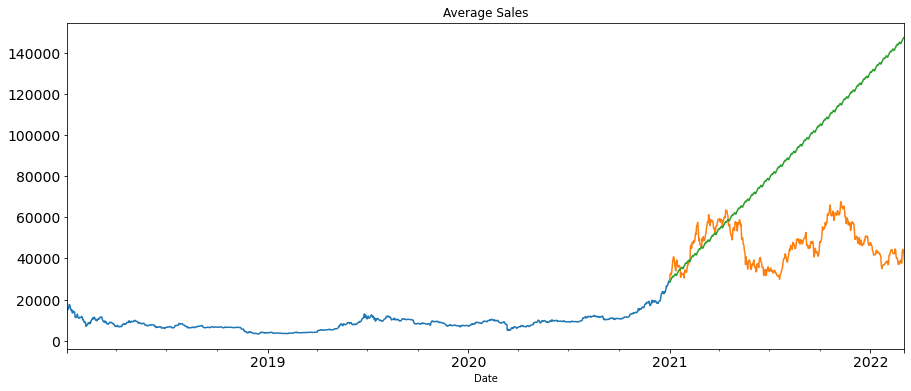

In [162]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
fit1 = ExponentialSmoothing(train,seasonal_periods=12,trend='add',seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))

train.plot(figsize=(15,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(15,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(15,6), title= 'Average Sales', fontsize=14)
plt.show()

- smoothing level=alpha
- smoothing slope=beta
- alpha value should be in the range of 0 to 1.
- values close to 0 indicate that older values are very less imp compared to the recent values
- values close to 1 indicate that older values are equally imp 

In [93]:
fit1.aic

12949.188955944956

In [94]:
Holt_Winter_df['Holt_Winter']

2021-01-01     28348.805922
2021-01-02     28576.155934
2021-01-03     29488.690746
2021-01-04     29785.922532
2021-01-05     30681.721331
                  ...      
2022-02-28    145894.977466
2022-03-01    146790.776265
2022-03-02    146942.725664
2022-03-03    147447.472263
2022-03-04    147159.641260
Freq: D, Length: 428, dtype: float64

In [95]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test,Holt_Winter_df.Holt_Winter))
print(rmse)

54220.52741141943


# ExponentialSmoothing for all data 

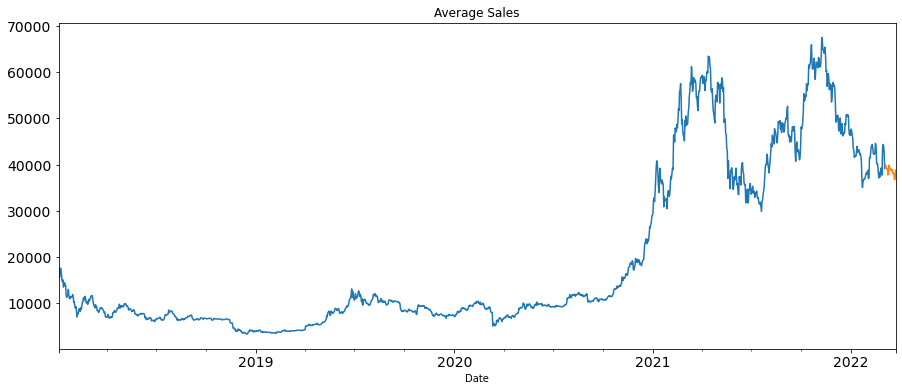

In [164]:
from statsmodels.tsa.api import ExponentialSmoothing
#seasinalperiods=gamma
fit1 = ExponentialSmoothing(y,seasonal_periods=12,trend='add',seasonal='add').fit()
#Y_predictions= fit1.predict(start=pd.to_datetime('2017-01-31'))
Y_prediction = fit1.forecast(steps=20)

y.plot(figsize=(15,6), title= 'Average Sales', fontsize=14)
Y_prediction.plot(figsize=(15,6), title= 'Average Sales', fontsize=14)
plt.show()

In [98]:
fit1.aic

21460.49862756827

In [99]:
Y_prediction

2022-03-05    39962.391511
2022-03-06    39909.467456
2022-03-07    39071.333332
2022-03-08    39171.594483
2022-03-09    39039.430929
2022-03-10    37757.706178
2022-03-11    37885.533090
2022-03-12    39836.544231
2022-03-13    39280.138621
2022-03-14    39212.129945
2022-03-15    39026.321922
2022-03-16    38662.262450
2022-03-17    38922.545622
2022-03-18    38869.621567
2022-03-19    38031.487444
2022-03-20    38131.748595
2022-03-21    37999.585040
2022-03-22    36717.860289
2022-03-23    36845.687202
2022-03-24    38796.698342
Freq: D, dtype: float64

# ExponentialSmoothing using predict data 

In [100]:
y.shape

(1523,)

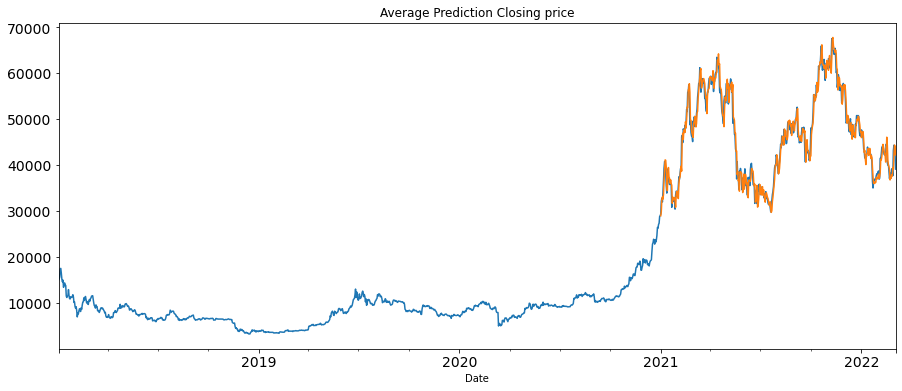

In [165]:
from statsmodels.tsa.api import ExponentialSmoothing
#seasinalperiods=gamma
fit1 = ExponentialSmoothing(y,seasonal_periods=12,trend='add',seasonal='add').fit()
Y_prediction= fit1.predict(start=pd.to_datetime('2021-01-01')) # using predict
#Y_prediction = fit1.forecast(steps=12)

y.plot(figsize=(15,6), title= 'Average Closing price', fontsize=14)
Y_prediction.plot(figsize=(15,6), title= 'Average Prediction Closing price', fontsize=14)
plt.show()

In [102]:
Y_prediction

Date
2021-01-01    28980.743898
2021-01-02    29871.699961
2021-01-03    32507.915285
2021-01-04    33078.213521
2021-01-05    32587.051910
                  ...     
2022-02-28    39166.112639
2022-03-01    42246.697683
2022-03-02    44388.743512
2022-03-03    44107.808424
2022-03-04    42242.950393
Freq: D, Length: 428, dtype: float64

# Finish 